In [314]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
# đọc dữ liệu
# dữ liệu cháy rừng --> dự đoán diện tích cháy (Area)
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Preproccesing

In [316]:
for col_name in df.columns:
    print("Total NaN: ", df[col_name].isna().sum())
    print("Total Null: ", df[col_name].isnull().sum())
    print("Data type: ", df[col_name].dtype)
    print('+' * 10)

Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  object
++++++++++
Total NaN:  0
Total Null:  0
Data type:  object
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++


In [317]:
def convert_day(day: str) -> int:
    day_dict = {
        "sun": 1,
        "mon": 2,
        "tue": 3,
        "wed": 4,
        "thu": 5,
        "fri": 6,
        "sat": 7
    }
    return day_dict[day]

In [318]:
def convert_month(month: str) -> int:
    month_dict = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    }
    return month_dict[month]

In [319]:
df["day"] = df["day"].apply(convert_day)

In [320]:
df["month"] = df["month"].apply(convert_month)

# Linear Regression

In [321]:
class LinearRegression1:
    def rmse(self, y, y_hat) -> float:
        delta = y - y_hat

        return np.square(delta).mean()**0.5
    
    def fit(self, X, y) -> None:
        cov = np.matmul(X.T, X)

        inv_cov = np.linalg.inv(cov)

        self.theta_ = inv_cov @ (X.T @ y)

    def predict(self, X) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)

        return y_pred

# Defining the input and output vector

In [322]:
def splitData(df):
    X_y = df.to_numpy()

    N = df.shape[0]
    X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8 * N)])
    return X_y_train, X_y_test

In [323]:
def trainTestXData(X_y_train, X_y_test):
    X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
    return X_train, X_test

In [324]:
def trainTestyData(X_y_train, X_y_test):
    y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]
    return y_train, y_test

In [325]:
def trainData(df):
    X_y_train, X_y_test = splitData(df)
    X_train, X_test = trainTestXData(X_y_train, X_y_test)
    y_train, y_test = trainTestyData(X_y_train, X_y_test)

    return X_y_train, X_y_test, X_train, X_test, y_train, y_test

# Fitting model

In [326]:
def training(df):
    lr = LinearRegression1()
    _, _, X_train, X_test, y_train, y_test = trainData(df)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    rmse = lr.rmse(y_pred, y_test)
    return lr, y_pred, rmse

# Visualization

In [327]:
def visualize(X_test, y_pred, y_test):
    x_axis = np.array(range(X_test.shape[0]))
    plt.scatter(x_axis, y_pred, c = 'r', label = 'predicted')
    plt.scatter(x_axis, y_test, c = 'b', label = 'true')
    plt.legend()

# Câu 1

In [328]:
_, _, _, X_test, _, y_test = trainData(df)

In [329]:
lr, y_pred, rmse = training(df)
lr.theta_, rmse

(array([ 0.93635773, -0.3591467 ,  2.96318228,  1.69088956, -0.10026437,
         0.11736952, -0.02818784, -0.87894102,  0.43059146, -0.18691921,
         0.03574787, -6.40072433]),
 79.42487925311059)

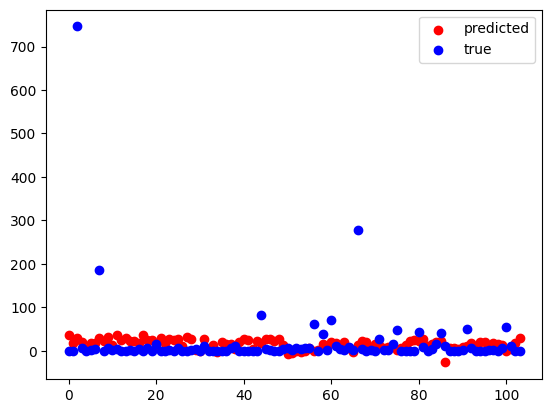

In [330]:
visualize(X_test, y_pred, y_test)

# Câu 2

In [331]:
# chuẩn hóa dữ liệu về phân phối có kì vọng = 0 và phương sai = 1
def standardize(df, columns):
    df1 = df.copy()

    for col in columns[:-1]:
        if df1[col].dtype == "float64":
            df1[col] = (df1[col] - df1[col].mean()) / df1[col].std()
        else: 
            print(f"{col} khong phai")
    
    return df1

In [332]:
df_chuan = standardize(df, df.columns)

X khong phai
Y khong phai
month khong phai
day khong phai
RH khong phai


In [333]:
lr1, y_pred, rmse = training(df_chuan)
lr1.theta_, rmse

(array([ 0.90897654, -0.48695915,  1.91064968,  1.54244285, -0.27977615,
         7.25140588, -4.36282686, -4.04571522,  1.77510052, -0.23404301,
         0.31415153, -1.37246369]),
 79.43530502790419)

In [334]:
# biến để visualize
_, _, _, X_test, _, y_test = trainData(df_chuan)

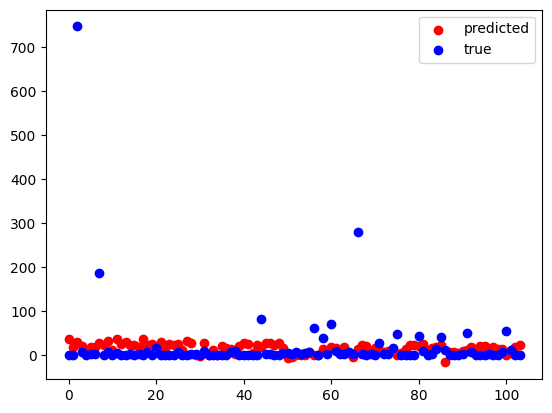

In [335]:
visualize(X_test, y_pred, y_test)

### Nhận xét:
rmse sau khi chuẩn hóa cao hơn trước khi chuẩn hóa 

# Câu 3

## Kiểm tra tính chất đồng tuyến tính

In [336]:
# kiểm tra tính tương quan
df_float = df.select_dtypes(include=["float64"])

cov = np.zeros((len(df_float.columns[:-1]), len(df_float.columns[:-1])))

for i, col_name_i in enumerate(df_float.columns[:-1]):
    for j, col_name_j in enumerate(df_float.columns[:-1]):
            cov[i, j] = np.corrcoef(df_float[col_name_i].to_numpy(), df_float[col_name_j].to_numpy())[0, 1]

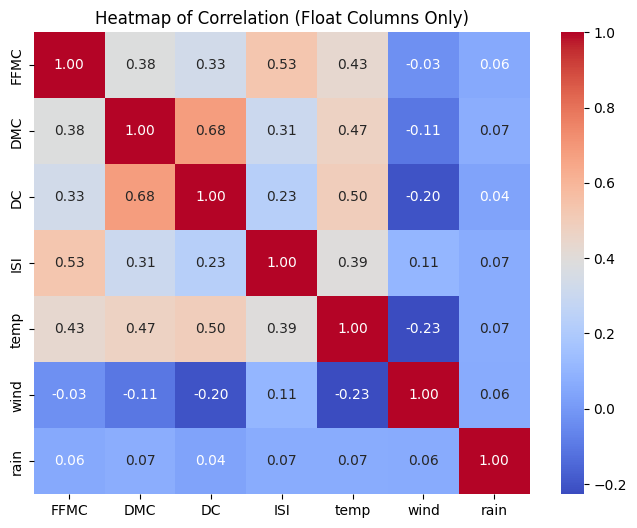

In [337]:
# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov, xticklabels=df_float.columns[:-1], yticklabels=df_float.columns[:-1], annot=cov, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation (Float Columns Only)")
plt.show()

Ta thấy mối tương quan giữa DC và DMC tương đối cao hơn so với các biến khác (= 0.68) 

=> có thể suy xét loại bỏ cột phụ thuộc tuyến tính này nếu tốn chi phí quá lớn để thu nhập dữ liệu 


## loại bỏ DMC:

In [338]:
df_uncorrelated = df.drop(columns=["DMC"])

In [339]:
_, _, _, X_test, _, y_test = trainData(df_uncorrelated)
X_test.shape, y_test.shape

((104, 11), (104,))

In [340]:
lr2, y_pred, rmse = training(df_uncorrelated)

In [341]:
lr2.theta_, rmse

(array([ 0.78578537, -0.09516896,  1.82342866,  1.59738514, -0.11110568,
        -0.00428073, -0.68289348,  0.64586897, -0.14152433,  0.20311006,
        -3.19012281]),
 79.50112783599091)

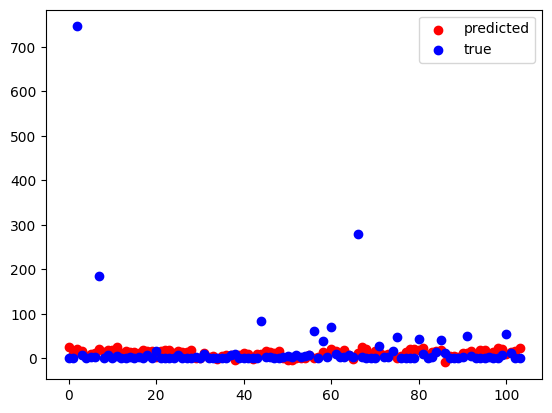

In [342]:
visualize(X_test, y_pred, y_test)

## loại bỏ DC

In [343]:

df_uncorrelated = df.drop(columns=["DC"])

In [344]:
_, _, _, X_test, _, y_test = trainData(df_uncorrelated)
X_test.shape, y_test.shape

((104, 11), (104,))

In [345]:
lr2, y_pred, rmse = training(df_uncorrelated)

In [346]:
lr2.theta_, rmse

(array([ 0.86768489,  0.20304715,  0.88416296,  1.66632497, -0.04203543,
         0.08611616, -0.88291005,  0.22666623, -0.22539044,  0.43346293,
        -6.08715099]),
 79.53387720494007)

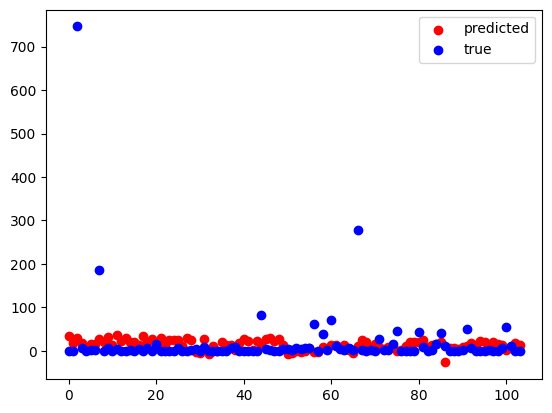

In [347]:
visualize(X_test, y_pred, y_test)

Từ thực nghiệm cho thấy sau khi bỏ DMC thì rmse thấp hơn khi bỏ DC 

=> bỏ DMC nếu chi phí qua lớn vì rmse khi bỏ cao hơn trước khi bỏ

# Câu 4

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [349]:
X_y = df.to_numpy()

In [350]:
X_y.shape

(517, 13)

In [351]:
X = X_y[:, :-1]
y = X_y[:, -1]
X.shape, y.shape

((517, 12), (517,))

In [352]:
_, _, X_train, X_test, y_train, y_test = trainData(df)

In [353]:
# Khởi tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(rmse)

# Hiển thị hệ số hồi quy
if isinstance(X, np.ndarray):
    coefficients = pd.DataFrame({"Feature": [f"Feature {i}" for i in range(X.shape[1])], 
                                 "Coefficient": model.coef_})
else:
    coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})

print(coefficients)


79.42418341039726
       Feature  Coefficient
0    Feature 0     0.925781
1    Feature 1    -0.303938
2    Feature 2     3.006395
3    Feature 3     1.702039
4    Feature 4    -0.029028
5    Feature 5     0.114961
6    Feature 6    -0.028706
7    Feature 7    -0.915613
8    Feature 8     0.473705
9    Feature 9    -0.168512
10  Feature 10     0.085722
11  Feature 11    -7.124255


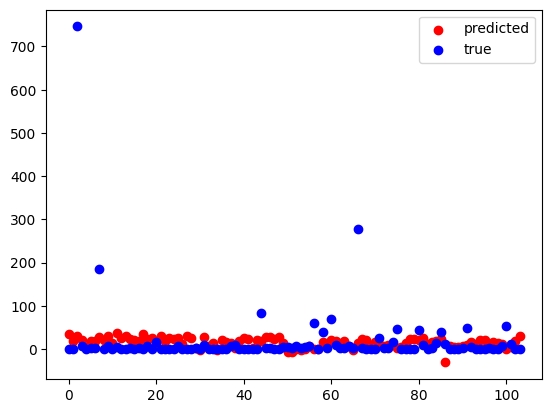

In [354]:
visualize(X_test, y_pred, y_test)